### Description
This notebook iteratively generates various plots for each station in the MWRA_TA_DIC_2017_to_2022 file. Additionally, some plots explore the relationship between two variables across all stations.

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter

In [38]:
# Read the data and parse the PROF_DATE_TIME_LOCAL column to a datetime object
data = pd.read_csv('../data/concat/MWRA_TA_DIC_2017_to_2022.csv'
                   , parse_dates=['PROF_DATE_TIME_LOCAL'])
date_form = DateFormatter("%m/%y")

In [ ]:
def save_fig(fig, fig_path):
  if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
  fig.savefig(fig_path)
  plt.close(fig)

### Plot Salinity vs Total Alkalinity

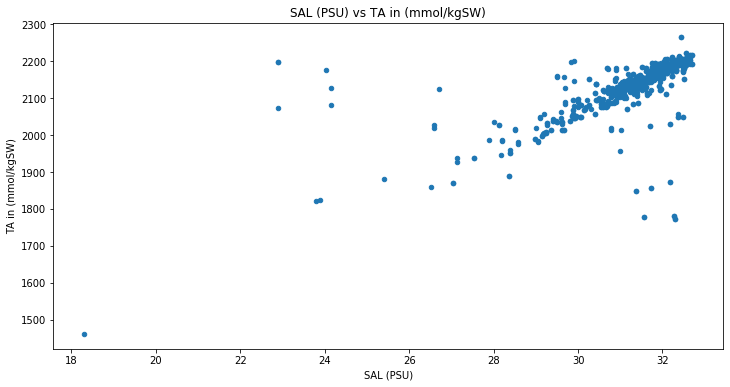

In [41]:
sal_and_ta = data[(data['SAL (PSU)'].notnull()) & (data['TA in (mmol/kgSW)'].notnull())]
# Plot 'SAL (PSU)' vs 'TA in (mmol/kgSW)'
sal_and_ta.plot(x='SAL (PSU)', y='TA in (mmol/kgSW)', kind = 'scatter', figsize=(12, 6))
plt.xlabel('SAL (PSU)')
plt.ylabel('TA in (mmol/kgSW)')
plt.title('SAL (PSU) vs TA in (mmol/kgSW)')
plt.show()

### Plot pH() TA and TCO2 combined graphs for each station

In [ ]:
# Stacked graphs of pH, TA, DIC for each station
stations = data['STAT_ID'].unique()
for stat_id in stations:
  stat_data = data[data['STAT_ID'] == stat_id]
  ph = stat_data[stat_data['pH ()'].notnull() & data['VAL_QUAL'].isnull()]
  ta  = stat_data[stat_data['TA in (mmol/kgSW)'].notnull()]
  dic = stat_data[stat_data['TCO2 in (mmol/kgSW)'].notnull()]

  fig, ax = plt.subplots(3, 1, figsize=(10, 10))
  fig.suptitle(stat_id)
  
  ax[0].plot(ph['PROF_DATE_TIME_LOCAL'], ph['pH ()'], 'o', color='red')
  ax[0].set_ylabel('pH')
  ax[0].xaxis.set_major_formatter(date_form)

  ax[1].plot(ta['PROF_DATE_TIME_LOCAL'], ta['TA in (mmol/kgSW)'], 'o', color='blue')
  ax[1].set_ylabel('TA in (mmol/kgSW)')
  ax[1].xaxis.set_major_formatter(date_form)

  ax[2].plot(dic['PROF_DATE_TIME_LOCAL'], dic['TCO2 in (mmol/kgSW)'], 'o', color='green')
  ax[2].set_ylabel('TCO2 in (mmol/kgSW)')
  ax[2].xaxis.set_major_formatter(date_form)
  fig_path = '../figures/' + stat_id + '.png'
  #save_fig(fig, fig_path)

### Plot the good and bad pH values for each station

In [ ]:
# Plot bad pH values in red, good in green, station-wise
ph = data[(data['pH ()'].notnull()) & (data['VAL_QUAL'].isnull())]
bad_ph = data[(data['pH ()'].notnull()) & (data['VAL_QUAL'].notnull())]

stations = ph['STAT_ID'].unique()
for stat_id in stations:
  fig, ax = plt.subplots(1, 1, figsize=(10, 10))
  fig.suptitle(stat_id)
  ax.plot(ph[ph['STAT_ID'] == stat_id]['PROF_DATE_TIME_LOCAL'], ph[ph['STAT_ID'] == stat_id]['pH ()'], 'o', color='green')
  ax.plot(bad_ph[bad_ph['STAT_ID'] == stat_id]['PROF_DATE_TIME_LOCAL'], bad_ph[bad_ph['STAT_ID'] == stat_id]['pH ()'], 'o', color='red')
  ax.xaxis.set_major_formatter(date_form)
  ax.set_ylabel('pH')
  fig_path = f'../figures/Per_Station/{stat_id}/pH_With_Bad_Vals.png'
  #save_fig(fig, fig_path)

### Plot the TA for each station

In [ ]:
# TA Station-wise
ta = data[data['TA in (mmol/kgSW)'].notnull()]
stations = ta['STAT_ID'].unique()
for stat_id in stations:
    station_data = ta[ta['STAT_ID'] == stat_id]
    # Scatter plot of PROF_DATE_TIME_LOCAL and pH ()
    station_data.plot(x='PROF_DATE_TIME_LOCAL', y='TA in (mmol/kgSW)', kind='scatter')
    plt.title(stat_id)
    plt.xlabel('DATE (month/year)')
    plt.gca().xaxis.set_major_formatter(date_form)
    fig_path = f'../figures/Per_Station/{stat_id}/TA.png'
    # Create the figure directory if it doesnt exist
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    #plt.savefig(fig_path)
    plt.close()

### Plot the DIC for each station

In [ ]:
# DIC Station-wise
dic = data[data['TCO2 in (mmol/kgSW)'].notnull()]
stations = dic['STAT_ID'].unique()
for stat_id in stations:
    station_data = dic[dic['STAT_ID'] == stat_id]
    # Scatter plot of PROF_DATE_TIME_LOCAL and pH ()
    station_data.plot(x='PROF_DATE_TIME_LOCAL', y='TCO2 in (mmol/kgSW)', kind='scatter')
    plt.title(stat_id)
    plt.xlabel('DATE (month/year)')
    plt.gca().xaxis.set_major_formatter(date_form)
    fig_path = f'../figures/Per_Station/{stat_id}/DIC.png'
    # Create the figure directory if it doesnt exist
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    #plt.savefig(fig_path)
    plt.close()

### Plot the temperature for each station

In [ ]:
# Temperature station-wise
ta = data[data['TEMP (C)'].notnull()]
stations = ta['STAT_ID'].unique()
for stat_id in stations:
    station_data = ta[ta['STAT_ID'] == stat_id]
    # Scatter plot of PROF_DATE_TIME_LOCAL and pH ()
    station_data.plot(x='PROF_DATE_TIME_LOCAL', y='TEMP (C)', kind='scatter')
    plt.title(stat_id)
    plt.xlabel('DATE (month/year)')
    plt.gca().xaxis.set_major_formatter(date_form)
    fig_path = f'../figures/Per_Station/{stat_id}/Temp.png'
    # Create the figure directory if it doesnt exist
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    plt.savefig(fig_path)
    plt.close()

### Plot pH vs Fluorescence

In [ ]:
# PH compared to FLUOR
dic = data[(data['FLUORESCENCE (ug/L)'].notnull()) & (data['VAL_QUAL'].isnull()) & (data['pH ()'].notnull())]
stations = dic['STAT_ID'].unique()
for stat_id in stations:
    station_data = dic[dic['STAT_ID'] == stat_id]
    # Plot PH and Fluor against time
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    fig.suptitle(stat_id)
    ax.plot(station_data['PROF_DATE_TIME_LOCAL'], station_data['pH ()'], 'o', color='green')
    ax.plot(station_data['PROF_DATE_TIME_LOCAL'], station_data['FLUORESCENCE (ug/L)'], 'o', color='red')
    ax.xaxis.set_major_formatter(date_form)
    ax.set_ylabel('pH')
    fig_path = f'../figures/Per_Station/{stat_id}/pH_with_FLU.png'
    if not os.path.exists(os.path.dirname(fig_path)):
        os.makedirs(os.path.dirname(fig_path))
    fig.savefig(fig_path)
    plt.close(fig)